In [115]:
#import the necessary library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import pickle

In [11]:
#fetching csv file into dataframe 
data=pd.read_csv('car data.csv')

data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [33]:
#understanding different categories of each feature
for i in range(5,data.shape[1]):
    print(data[data.columns[i]].unique())
    print('\n')
     
        

['Petrol' 'Diesel' 'CNG']


['Dealer' 'Individual']


['Manual' 'Automatic']


[0 1 3]




In [39]:
#cheaking any missing or null value present
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [55]:
#dropping columns which is less significant for model training 

final_data=data.drop(labels='Car_Name',axis=1)
#normalizing year data 
final_data['Current_data']=2022
final_data['No_year']=final_data['Current_data']-final_data['Year']
final_data=final_data.drop(['Year','Current_data'],axis=1)
final_data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [68]:
final_data=pd.get_dummies(final_data,drop_first=True)
final_data


,Selling_Price,Present_Price,Kms_Driven,Owner,No_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,1,0,0,1
297,4.00,5.90,60000,0,7,0,1,0,1
298,3.35,11.00,87934,0,13,0,1,0,1
299,11.50,12.50,9000,0,5,1,0,0,1


<AxesSubplot:>

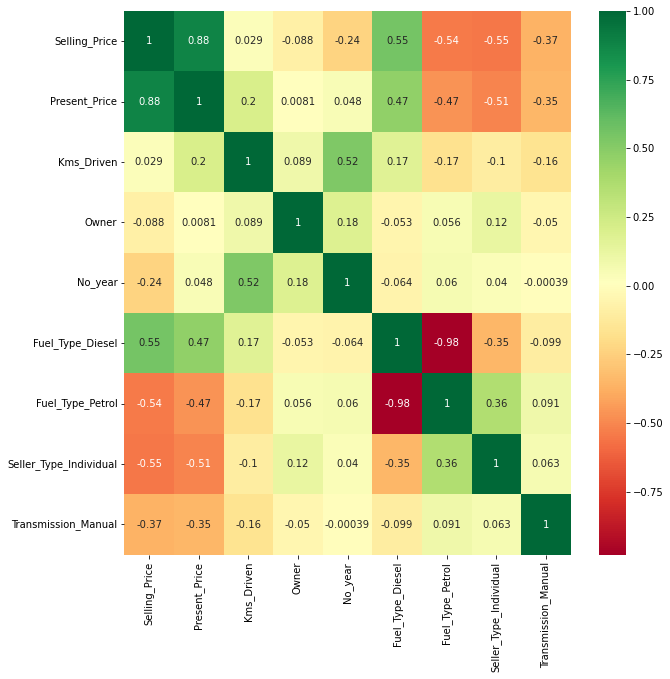

In [70]:
#visualing correlation 
plt.figure(figsize=(10,10))
sns.heatmap(final_data.corr(),annot=True,cmap='RdYlGn')
    

In [75]:
#distinguishing dependent and independent features

X=final_data.iloc[:,1:]
y=final_data.Selling_Price

In [77]:
#feature importance  

from sklearn.ensemble import ExtraTreesRegressor

model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

[0.34364335 0.04253476 0.00077648 0.07603075 0.24573607 0.00556958
 0.13048729 0.15522171]


<AxesSubplot:>

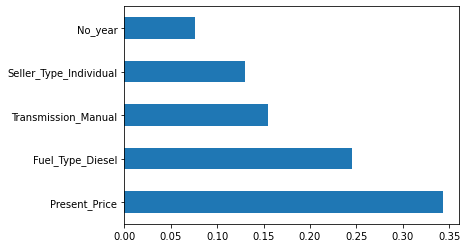

In [90]:

print(model.feature_importances_)
features_importance=pd.Series(model.feature_importances_,index=X.columns)
features_importance.nlargest(5).plot(kind='barh')

In [92]:
#spliting training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [107]:
#hyperperamater
#Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

#number of features to consider at every split
max_features=['auto','sqrt']

#maximum number of levels in tree

max_depth=[int(x) for x in np.linspace(5,30,num=6)]

#Minimum number of samples required to split a node 

min_samples_split=[2,5,10,15,100]

#Minimum number of sample required at each leaf node

min_samples_leaf=[1,2,5,10]

In [108]:
#assigning values
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf
             
}

In [104]:
#creating base model

rf=RandomForestRegressor()

In [109]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,scoring='neg_mean_squared_error',
                            cv=5,verbose=2,random_state=42,n_jobs=1)

In [110]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [112]:
#prediction of data
predictions=rf_random.predict(X_test)

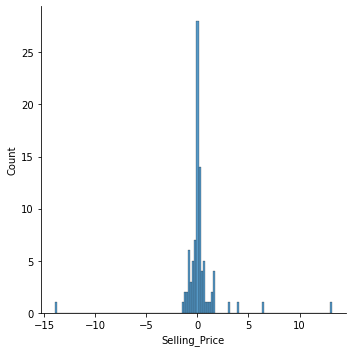

In [113]:
sns.displot(y_test-predictions)

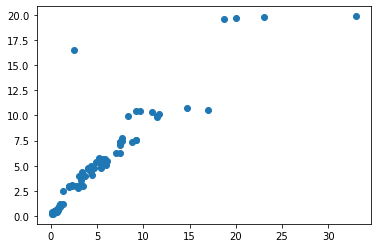

In [114]:
plt.scatter(y_test,predictions)

In [116]:
#dump model using pickle

file=open('random_forest_model.pkl','wb')
pickle.dump(rf_random,file)

In [117]:
final_data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No_year',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')